# Лабораторная работа №0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Датасет [Predicting Pulsar Star](https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate)

In [2]:
data = pd.read_csv('pulsar_data_train.csv')

In [3]:
data.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [4]:
data = data.rename(columns={" Mean of the integrated profile": "Mean IP",
                            " Standard deviation of the integrated profile": "Std IP",
                            " Excess kurtosis of the integrated profile": "Kurtosis IP",
                            " Skewness of the integrated profile": "Skewness IP",
                            " Mean of the DM-SNR curve": "Mean DM-SNR",
                            " Standard deviation of the DM-SNR curve": "Std DM-SNR",
                            " Excess kurtosis of the DM-SNR curve": "Kurtosis DM-SNR",
                            " Skewness of the DM-SNR curve": "Skewness DM-SNR",
                            "target_class": "class"})
data['class'] = data['class'].astype('int32')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean IP          12528 non-null  float64
 1   Std IP           12528 non-null  float64
 2   Kurtosis IP      10793 non-null  float64
 3   Skewness IP      12528 non-null  float64
 4   Mean DM-SNR      12528 non-null  float64
 5   Std DM-SNR       11350 non-null  float64
 6   Kurtosis DM-SNR  12528 non-null  float64
 7   Skewness DM-SNR  11903 non-null  float64
 8   class            12528 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 832.1 KB


In [6]:
data.isna().sum()

Mean IP               0
Std IP                0
Kurtosis IP        1735
Skewness IP           0
Mean DM-SNR           0
Std DM-SNR         1178
Kurtosis DM-SNR       0
Skewness DM-SNR     625
class                 0
dtype: int64

В датесете имеются пропуски в данных. Удалим соответствующие строки.

In [7]:
# pulsar_means = dict()
# non_pulsar_means = dict()
# for column in ['Kurtosis IP', 'Std DM-SNR', 'Skewness DM-SNR']:
#     pulsar_means[column] = data[data['class'] == 1][column].mean()
#     non_pulsar_means[column] = data[data['class'] == 0][column].mean()
    
# data[data['class'] == 1] = data[data['class'] == 1].fillna(pulsar_means)
# data[data['class'] == 0] = data[data['class'] == 0].fillna(non_pulsar_means)

data = data.dropna()

In [8]:
data.isna().all()

Mean IP            False
Std IP             False
Kurtosis IP        False
Skewness IP        False
Mean DM-SNR        False
Std DM-SNR         False
Kurtosis DM-SNR    False
Skewness DM-SNR    False
class              False
dtype: bool

Распределения признаков

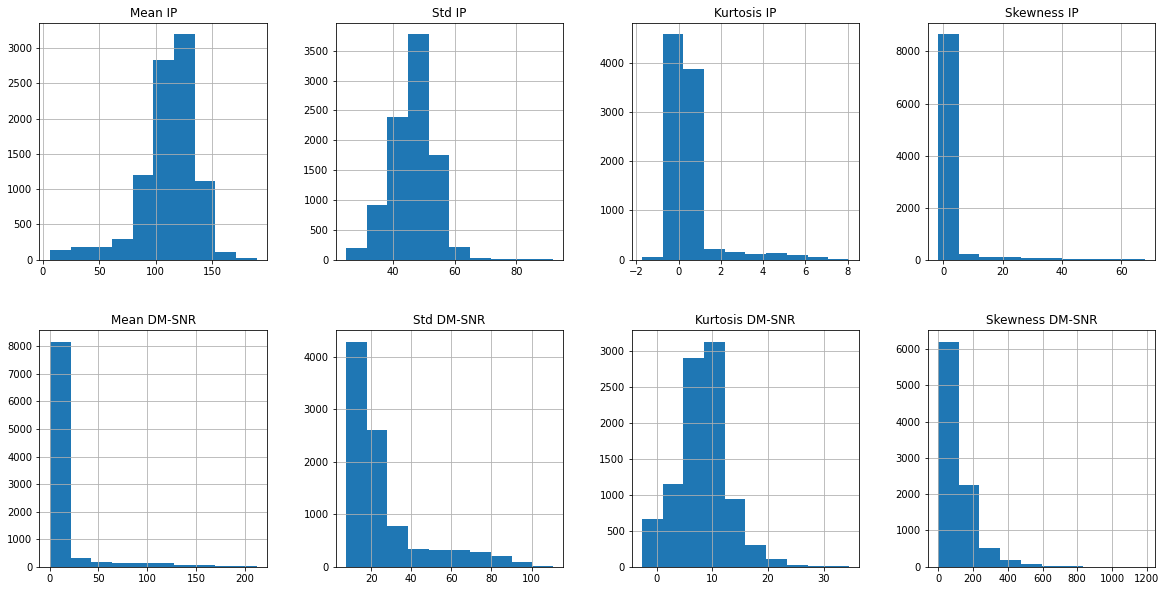

In [9]:
columns = ['Mean IP', 'Std IP', 'Kurtosis IP', 'Skewness IP', 'Mean DM-SNR', 'Std DM-SNR', 'Kurtosis DM-SNR', 'Skewness DM-SNR']
data.hist(columns, layout=(2, 4), figsize=(20, 10))
pass

In [10]:
data.describe()

,Mean IP,Std IP,Kurtosis IP,Skewness IP,Mean DM-SNR,Std DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


Коэффициенты корреляции. Некоторые признаки коррелируют между собой

In [11]:
data.corr()

,Mean IP,Std IP,Kurtosis IP,Skewness IP,Mean DM-SNR,Std DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,class
Mean IP,1.000000,0.554197,-0.872497,-0.734920,-0.299984,-0.307431,0.236010,0.146103,-0.675819
Std IP,0.554197,1.000000,-0.528370,-0.542560,-0.011061,-0.059486,0.036907,0.030959,-0.368223
Kurtosis IP,-0.872497,-0.528370,1.000000,0.944715,0.421126,0.436362,-0.344571,-0.216748,0.790866
Skewness IP,-0.734920,-0.542560,0.944715,1.000000,0.415570,0.415902,-0.328328,-0.204109,0.704743
Mean DM-SNR,-0.299984,-0.011061,0.421126,0.415570,1.000000,0.796449,-0.614526,-0.353186,0.407043
Std DM-SNR,-0.307431,-0.059486,0.436362,0.415902,0.796449,1.000000,-0.807013,-0.573260,0.493163
Kurtosis DM-SNR,0.236010,0.036907,-0.344571,-0.328328,-0.614526,-0.807013,1.000000,0.924326,-0.390352
Skewness DM-SNR,0.146103,0.030959,-0.216748,-0.204109,-0.353186,-0.573260,0.924326,1.000000,-0.258428
class,-0.675819,-0.368223,0.790866,0.704743,0.407043,0.493163,-0.390352,-0.258428,1.000000


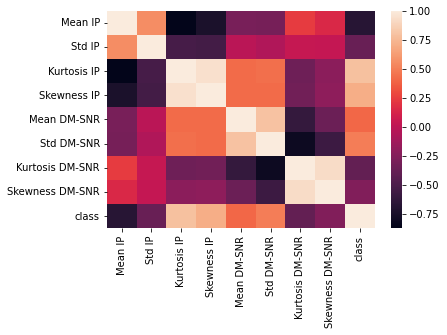

In [12]:
sns.heatmap(data.corr())
pass

In [13]:
data.corrwith(data['class']).sort_values()

Mean IP           -0.675819
Kurtosis DM-SNR   -0.390352
Std IP            -0.368223
Skewness DM-SNR   -0.258428
Mean DM-SNR        0.407043
Std DM-SNR         0.493163
Skewness IP        0.704743
Kurtosis IP        0.790866
class              1.000000
dtype: float64

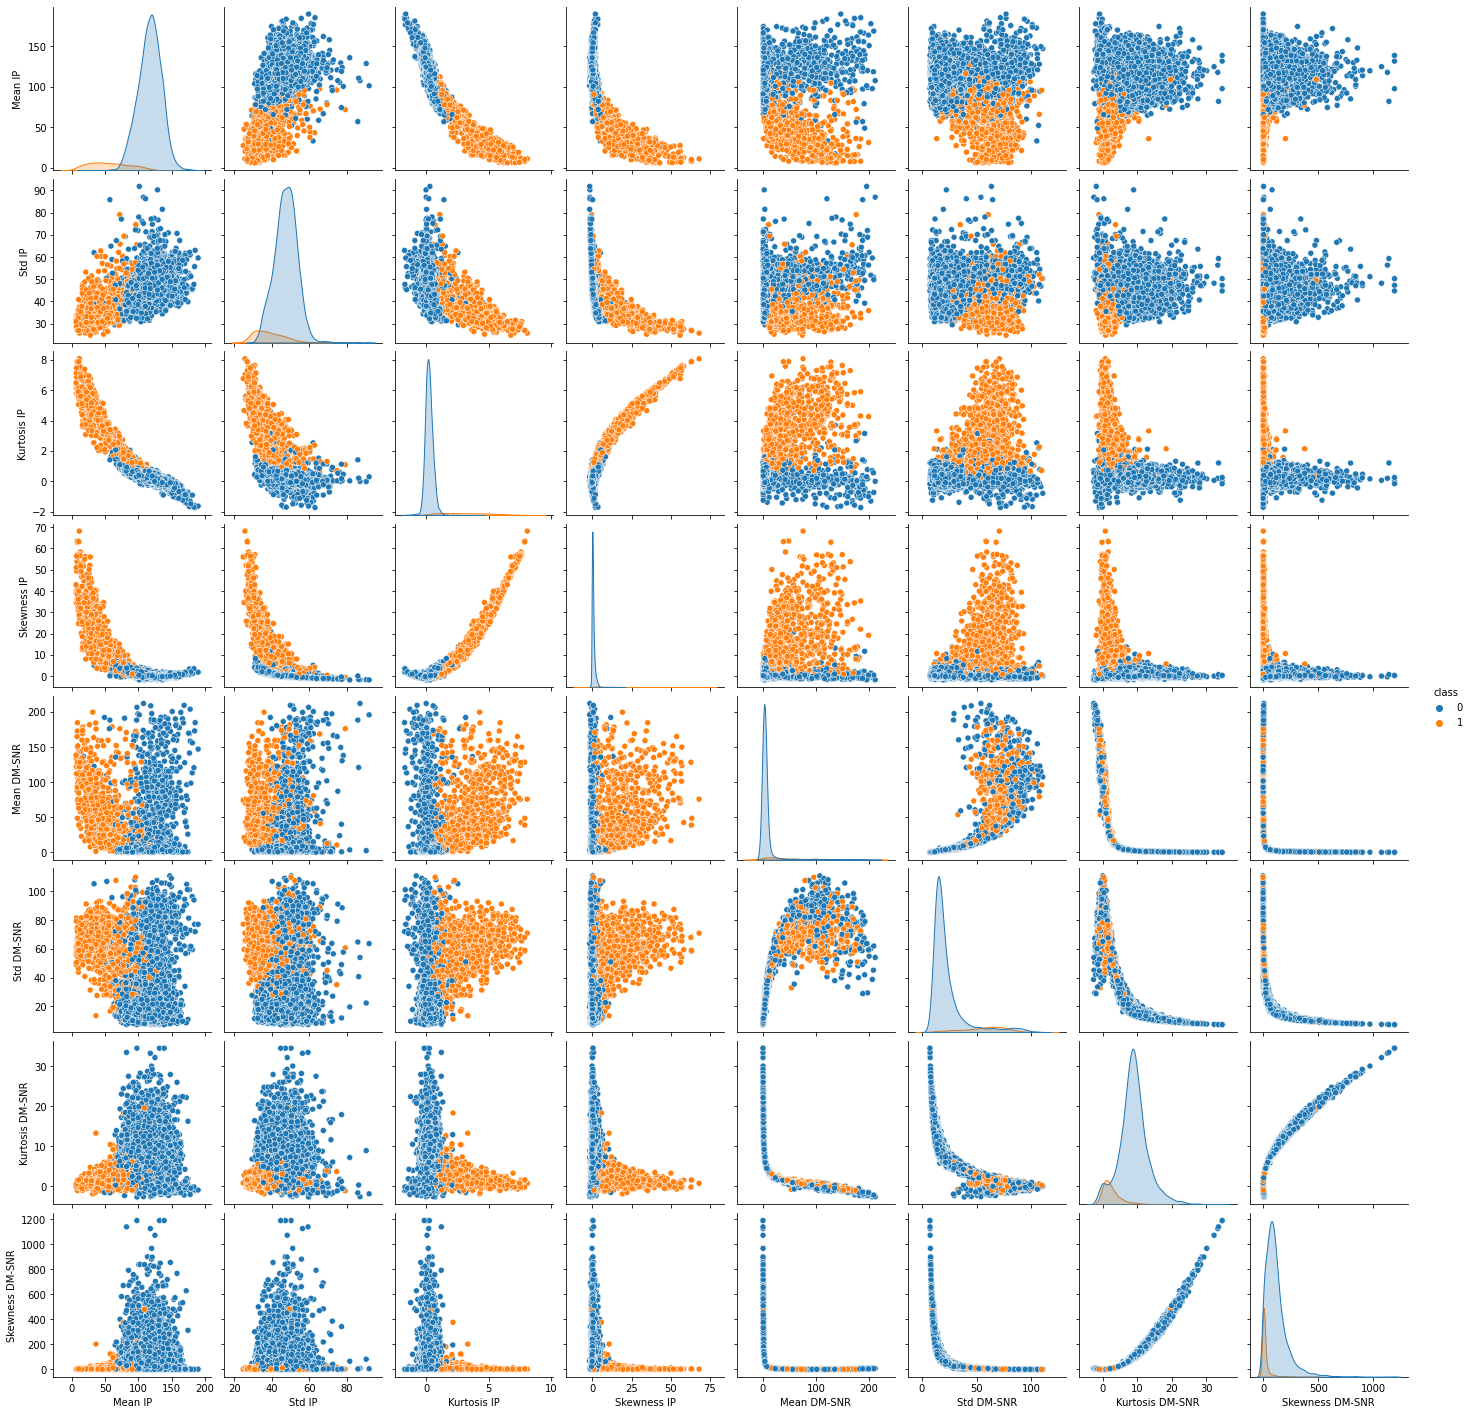

In [14]:
sns.pairplot(data=data, hue='class')
pass

Соотношения классов

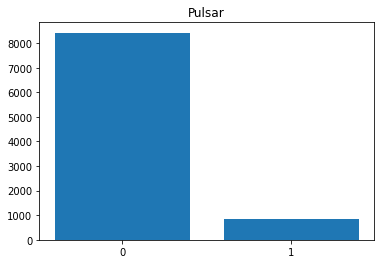

In [15]:
indexes = data['class'].value_counts().index
counts = data['class'].value_counts().values
plt.title('Pulsar')
plt.xticks(indexes)

plt.bar(indexes, counts)
plt.show()

In [16]:
sample = data[data['class'] == 1]
while data[data['class'] == 1].shape[0] + sample.shape[0] < data[data['class'] == 0].shape[0]:
    data = pd.concat([data, sample])
data = pd.concat([data, sample.iloc[:data[data['class'] == 0].shape[0] - data[data['class'] == 1].shape[0]]])

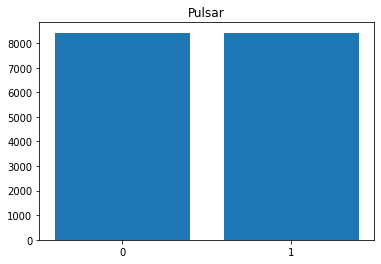

In [17]:
indexes = data['class'].value_counts().index
counts = data['class'].value_counts().values
plt.title('Pulsar')
plt.xticks(indexes)

plt.bar(indexes, counts)
plt.show()

In [18]:
data.shape

(16846, 9)